<a href="https://colab.research.google.com/github/namanadlakha3/Major1/blob/main/Major1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:

!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
df=yf.download('FB',start='2016-01-01')

     |████████████████████████████████| 5.5MB 2.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6aeada59f921936cf61a35cf82eb896c9ab6116625e7cd7a88f6d0f92eb5ca97
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=815167cdb75220c80a8ea24d833a7cacf169765fb8fc62e87edb21d462ebde53
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials
[*********************100%***********************]  1 of 1 completed


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
1,2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
2,2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
3,2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900
4,2016-01-08,99.879997,100.500000,97.029999,97.330002,97.330002,35402300


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1214,2020-10-28,278.790009,278.790009,267.260010,267.670013,267.670013,23121800
1215,2020-10-29,276.549988,283.600006,273.779999,280.829987,280.829987,32368100
1216,2020-10-30,274.500000,276.700012,259.100006,263.109985,263.109985,47247800
1217,2020-11-02,264.600006,270.470001,257.339996,261.359985,261.359985,27133400
1218,2020-11-03,263.160004,270.049988,260.890015,266.199890,266.199890,10964497


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0       102.220001
1       102.730003
2       102.970001
3        97.919998
4        97.330002
           ...    
1214    267.670013
1215    280.829987
1216    263.109985
1217    261.359985
1218    266.199890
Name: Close, Length: 1219, dtype: float64

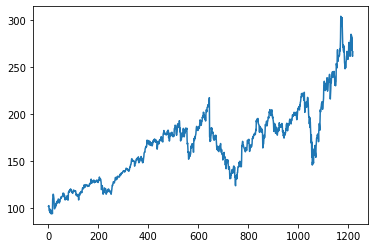

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       102.220001
1       102.730003
2       102.970001
3        97.919998
4        97.330002
           ...    
1214    267.670013
1215    280.829987
1216    263.109985
1217    261.359985
1218    266.199890
Name: Close, Length: 1219, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.03842669]
 [0.04085816]
 [0.04200237]
 ...
 [0.80548263]
 [0.79713936]
 [0.820214  ]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

#train_data,test_data=df1[test_size:len(df1),:],df1[0:test_size,:1]

In [18]:
training_size,test_size

(792, 427)

In [19]:
train_data

array([[0.03842669],
       [0.04085816],
       [0.04200237],
       [0.01792608],
       [0.01511322],
       [0.01597139],
       [0.02483909],
       [0.0061025 ],
       [0.02007151],
       [0.00386173],
       [0.00524433],
       [0.00090582],
       [0.        ],
       [0.01802145],
       [0.0135876 ],
       [0.01516087],
       [0.00138257],
       [0.07127531],
       [0.08605481],
       [0.09978542],
       [0.09749701],
       [0.08834326],
       [0.07785456],
       [0.0472467 ],
       [0.02665076],
       [0.02564957],
       [0.03261023],
       [0.03694875],
       [0.0374255 ],
       [0.03551846],
       [0.05263406],
       [0.04438616],
       [0.04963049],
       [0.06197855],
       [0.05387364],
       [0.06064359],
       [0.06631703],
       [0.06560188],
       [0.0608343 ],
       [0.07466029],
       [0.07528006],
       [0.07351608],
       [0.06784265],
       [0.0551609 ],
       [0.05611441],
       [0.06364719],
       [0.06274134],
       [0.072

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(691, 100)
(691,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(326, 100)
(326,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 265ms/step - loss: 0.0349 - val_loss: 0.0096
Epoch 2/100
11/11 [==============================] - 2s 175ms/step - loss: 0.0045 - val_loss: 0.0119
Epoch 3/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0029 - val_loss: 0.0205
Epoch 4/100
11/11 [==============================] - 2s 168ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 5/100
11/11 [==============================] - 2s 172ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 6/100
11/11 [==============================] - 2s 169ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 7/100
11/11 [==============================] - 2s 172ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 8/100
11/11 [==============================] - 2s 170ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 9/100
11/11 [==============================] - 2s 179ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 10/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0011 - val_lo

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.3.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

157.16350006399003

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

212.0087001656241

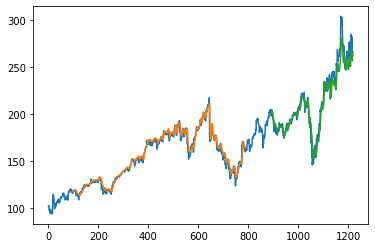

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()